<a href="https://colab.research.google.com/github/Adharsh0001/Machine-Learning/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Required Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Getting the data and Cleaning it. Data received is of Geyser eruption data

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/Adharsh0001/Machine-Learning/main/faithful.csv")
del df["Unnamed: 0"]
df.describe()
df.isnull().sum()
df = df.drop_duplicates()

Plotting the data to understand the data spread

Text(0.5, 1.0, 'Visualization of raw data')

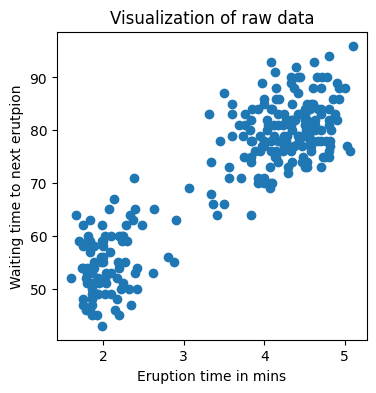

In [16]:
plt.figure(figsize = (4,4))
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.xlabel("Eruption time in mins")
plt.ylabel("Waiting time to next erutpion")
plt.title("Visualization of raw data")

In [17]:
df

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


Splitting is not required as we are not trying to predict the data

Applying Scaling onto data and applying KMeans clustering

In [42]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_std = scaler.fit_transform(df)

from sklearn.cluster import KMeans
#km = KMeans(n_clusters =3)
seed = np.random.randint(0,100000,size =1)[0]
km = KMeans(n_clusters=3,max_iter=3, init ="random",n_init=1,random_state=np.random.RandomState(seed))
km.fit(x_std)

centroids = km.cluster_centers_
centroids
km.labels_
km.inertia_

55.7417235408128

Plotting the Clusters

Text(0.5, 1.0, 'Visualisation of cluster data')

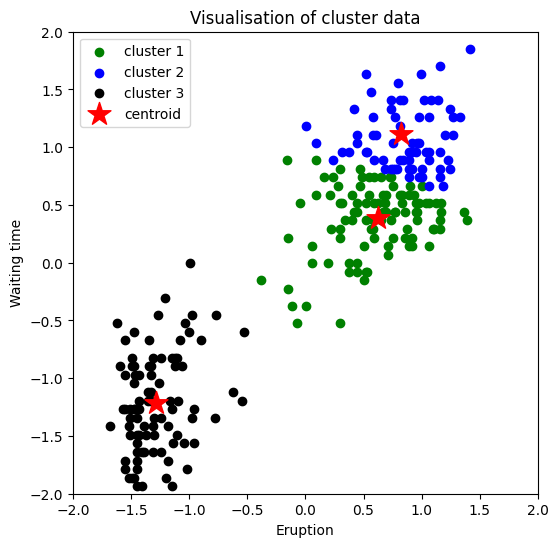

In [43]:
fig,ax = plt.subplots(figsize = (6,6))
plt.scatter(x_std[km.labels_ == 0,0],x_std[km.labels_ ==0,1], c ='green' , label = 'cluster 1')
plt.scatter(x_std[km.labels_ == 1,0],x_std[km.labels_ == 1,1], c ='blue' , label = 'cluster 2')
plt.scatter(x_std[km.labels_ == 2,0],x_std[km.labels_ == 2,1], c ='black' , label = 'cluster 3')
plt.scatter(centroids[:,0],centroids[:,1], marker = '*', s =300, c ="red", label = "centroid")
plt.legend()
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel("Eruption")
plt.ylabel("Waiting time")
plt.title("Visualisation of cluster data")

Plotting the inertia for different number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

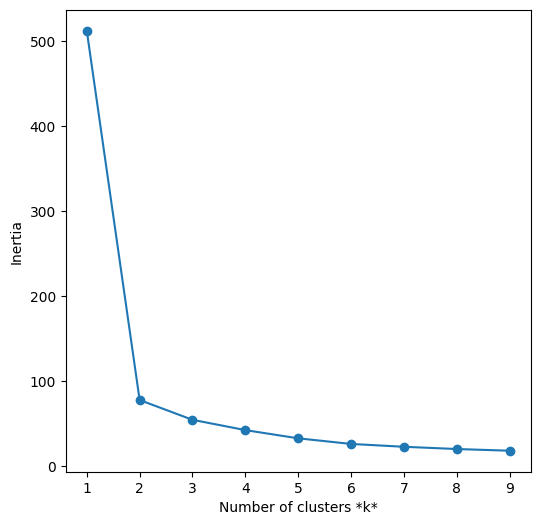

In [33]:
inertias = []
list_k = list(range(1,10))
for k in list_k:
  km = KMeans(n_clusters =k)
  km.fit(x_std)
  inertias.append(km.inertia_)

plt.figure(figsize = (6,6))
plt.plot(list_k,inertias, "-o")
plt.xlabel(r"Number of clusters *k*")
plt.ylabel("Inertia")